<a href="https://colab.research.google.com/github/edfakie2/Sales-Predictions/blob/main/Copy_of_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
filename = '/content/sales_predictions.csv'


In [2]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.duplicated().sum()


0

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
print(df['Outlet_Identifier'].unique())
print('\n')
print(df['Outlet_Location_Type'].unique().sum())
print('\n')
print(df['Outlet_Size'].unique())
print('\n')
print(df['Outlet_Type'].unique())


['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Tier 1Tier 3Tier 2


['Medium' nan 'High' 'Small']


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [7]:
Outlet_I_Filter1 = df['Outlet_Identifier'] == 'OUT010'
Outlet_I_Filter2 = df['Outlet_Identifier'] =='OUT045'
Outlet_I_Filter3 = df['Outlet_Identifier'] == 'OUT017'

In [8]:
Tier_Filter1 = df['Outlet_Location_Type'] == 'Tier 1'
Tier_Filter2 = df['Outlet_Location_Type'] == 'Tier 2'
Tier_Filter3 = df['Outlet_Location_Type'] == 'Tier 3'

In [9]:
Size_Filter1 = df['Outlet_Size'] == 'Small'
Size_Filter2 = df['Outlet_Size'] == 'Medium'
Size_Filter3 = df['Outlet_Size'] == 'High'
Size_Filter4 = df['Outlet_Size']

In [10]:
Outlet_Type_1 = df['Outlet_Type'] == 'Supermarket Type1'
Outlet_Type_2 = df['Outlet_Type'] == 'Supermarket Type2'
Outlet_Type_3 = df['Outlet_Type'] == 'Supermarket Type3'
Outlet_Type_4 = df['Outlet_Type'] == 'Grocery Store'

In [11]:
df=df.fillna("")

In [12]:
## Was the the only 'Grocery Store' Without a value for Small 
df.loc[Outlet_I_Filter1, 'Outlet_Size'] = df.loc[Outlet_I_Filter1, 'Outlet_Size'].replace('','Small')
df.loc[Outlet_I_Filter1, 'Outlet_Size']

3       Small
28      Small
30      Small
45      Small
65      Small
        ...  
8400    Small
8432    Small
8473    Small
8486    Small
8509    Small
Name: Outlet_Size, Length: 555, dtype: object

In [13]:
df.loc[Outlet_Type_1 & Tier_Filter2]
## Same Here The Missing Values for 'OUT17 and OUT045' seem to all be small because of the Corrilation between "Supermarket 1 and Tier 2"

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.6,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.0,Low Fat,0.099887,Household,45.9060,OUT017,2007,,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.8,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.0,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.0,Regular,0.054489,Canned,57.5904,OUT045,2002,,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.2850


In [14]:
df.loc[Outlet_I_Filter2, 'Outlet_Size'] = df.loc[Outlet_I_Filter2, 'Outlet_Size'].replace('','Small')
df.loc[Outlet_I_Filter3, 'Outlet_Size'] = df.loc[Outlet_I_Filter3, 'Outlet_Size'].replace('','Small')

In [15]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [16]:
## Item Weight was the only other missing value will handle with pipeline and mean

In [19]:
df['Item_MRP'] = df['Item_MRP'].astype(int)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)
df['Item_Visibility'] = df['Item_Visibility'].astype(float)

In [20]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [22]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

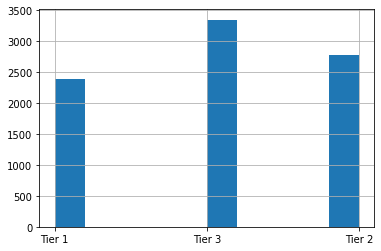

In [27]:
df['Outlet_Location_Type'].hist();

In [28]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2180.786577
std       1706.497259
min         33.000000
25%        833.500000
50%       1794.000000
75%       3101.000000
max      13086.000000
Name: Item_Outlet_Sales, dtype: float64

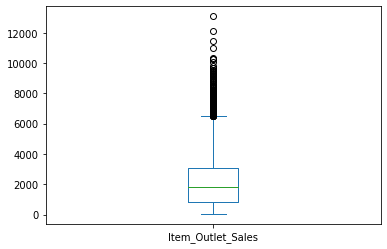

In [29]:
df['Item_Outlet_Sales'].plot(kind='box');

In [30]:
corr=df.corr()
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001292,-0.074834,-0.128629
Item_MRP,-0.001292,1.000000,0.005106,0.567516
Outlet_Establishment_Year,-0.074834,0.005106,1.000000,-0.049134
Item_Outlet_Sales,-0.128629,0.567516,-0.049134,1.000000


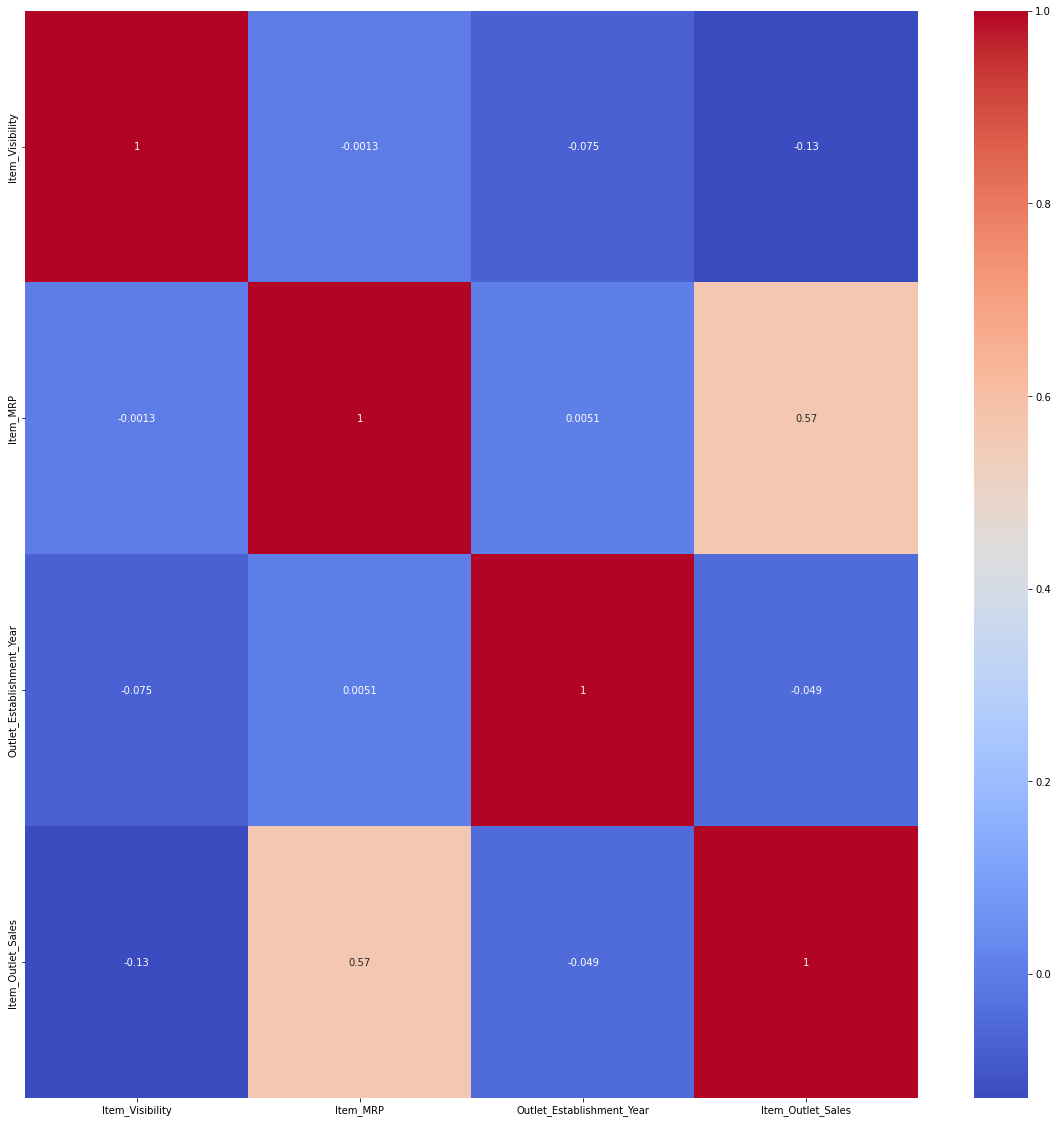

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm',annot=True);

In [33]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [34]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [35]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [36]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, encoder)


In [37]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)

In [38]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8553df68d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8553df6850>)])

In [39]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [40]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1591)




array([[-0.71277507,  1.82864837,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.59909046,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24778821,  0.13618724, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52525097,  0.49368575, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.39094318,  1.0895166 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.74224544, -0.10214509, ...,  1.        ,
         0.        ,  0.        ]])